In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cmasher as cmr
import matplotlib.colors as colors
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['figure.dpi'] = 200

In [3]:
data = np.load('../data/Mixing_layer_Temperature_example.npz')['T']

# Never use jet! 

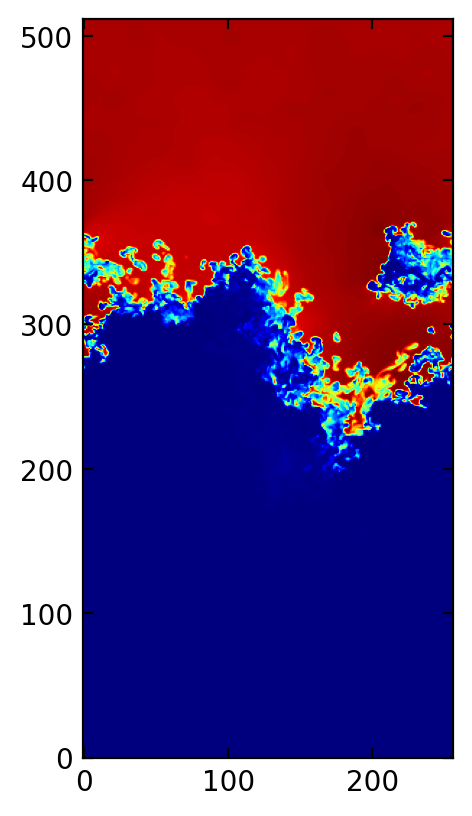

In [88]:
plt.imshow(data, origin='lower', aspect='equal', cmap="jet")

# the defaults are good

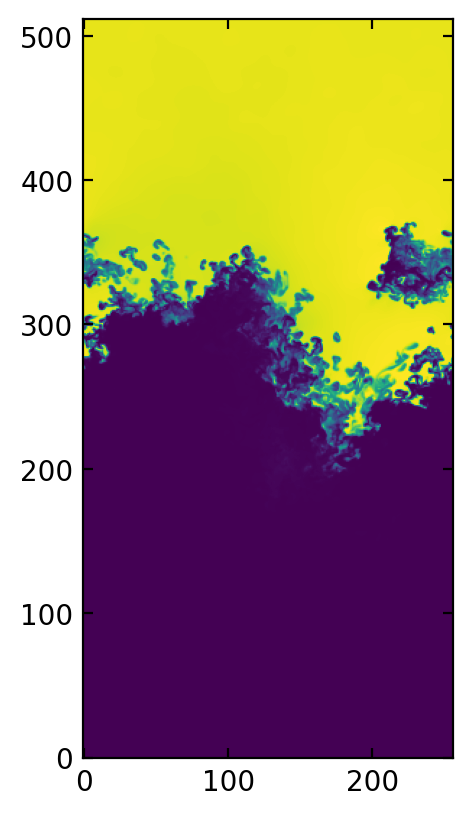

In [89]:
plt.imshow(data, origin='lower', aspect='equal')

# but you can do better! by thinking about what you are conveying

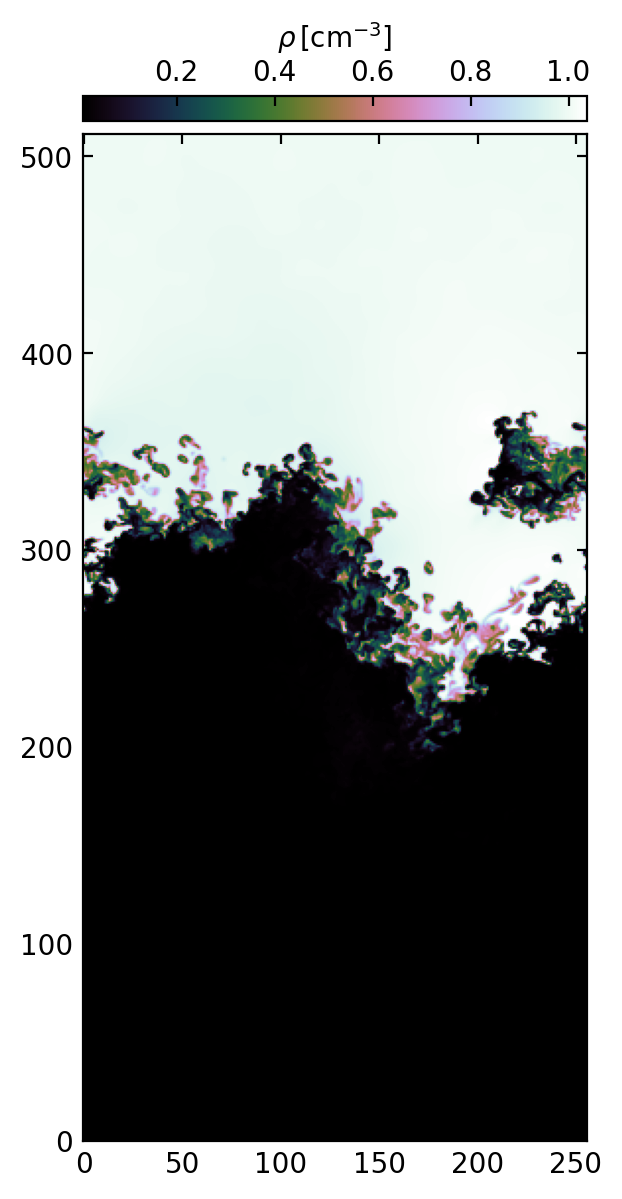

In [90]:
fig, ax = plt.subplots()
plot = ax.imshow(data, origin='lower', aspect='equal', cmap='cubehelix')
cbar = fig.colorbar(plot, ax=ax, location='top', pad = 0.01)
cbar.set_label(r'$\rho \, [{\rm cm}^{-3}]$')
fig.set_size_inches(3.25, 8)


# If this data represented temperature then you can certainly evoke hot and cold by using red and blue

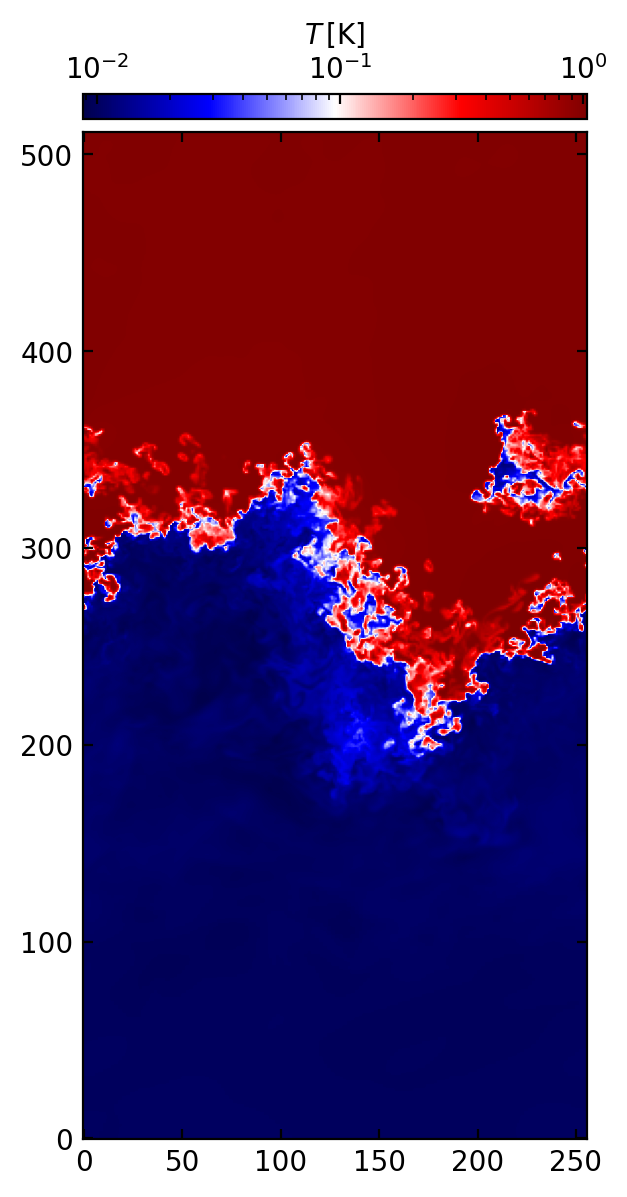

In [91]:
fig, ax = plt.subplots()
plot = ax.imshow(data, origin='lower', aspect='equal', cmap='seismic', norm=colors.LogNorm())
cbar = fig.colorbar(plot, ax=ax, location='top', pad = 0.01)
cbar.set_label(r'$T \, [{\rm K}]$')
fig.set_size_inches(3.25, 8)

# Things would be a bit weird if you had it reversed. Cold is blue?? It is like a backwards faucet!

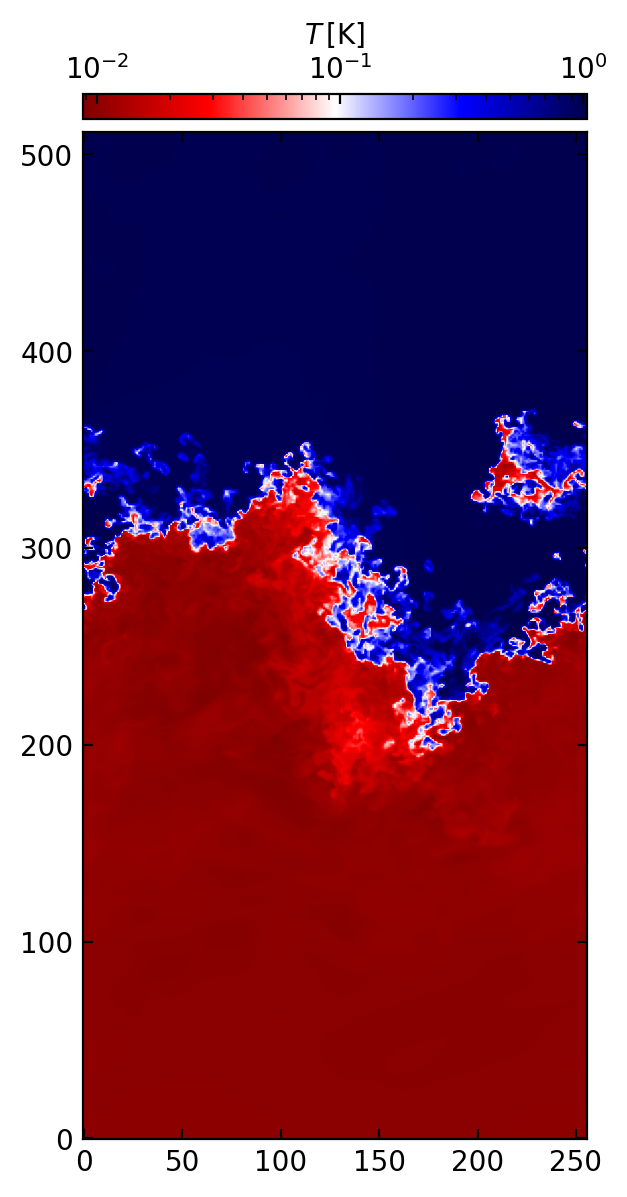

In [92]:
fig, ax = plt.subplots()
plot = ax.imshow(data, origin='lower', aspect='equal', cmap='seismic_r', norm=colors.LogNorm())
cbar = fig.colorbar(plot, ax=ax, location='top', pad = 0.01)
cbar.set_label(r'$T \, [{\rm K}]$')
fig.set_size_inches(3.25, 8)

# This is a great opportunity to play around with colormaps that you like and that convey the message you want to convey

In [93]:
import cmasher as cmr
import palettable
import colorcet as cc


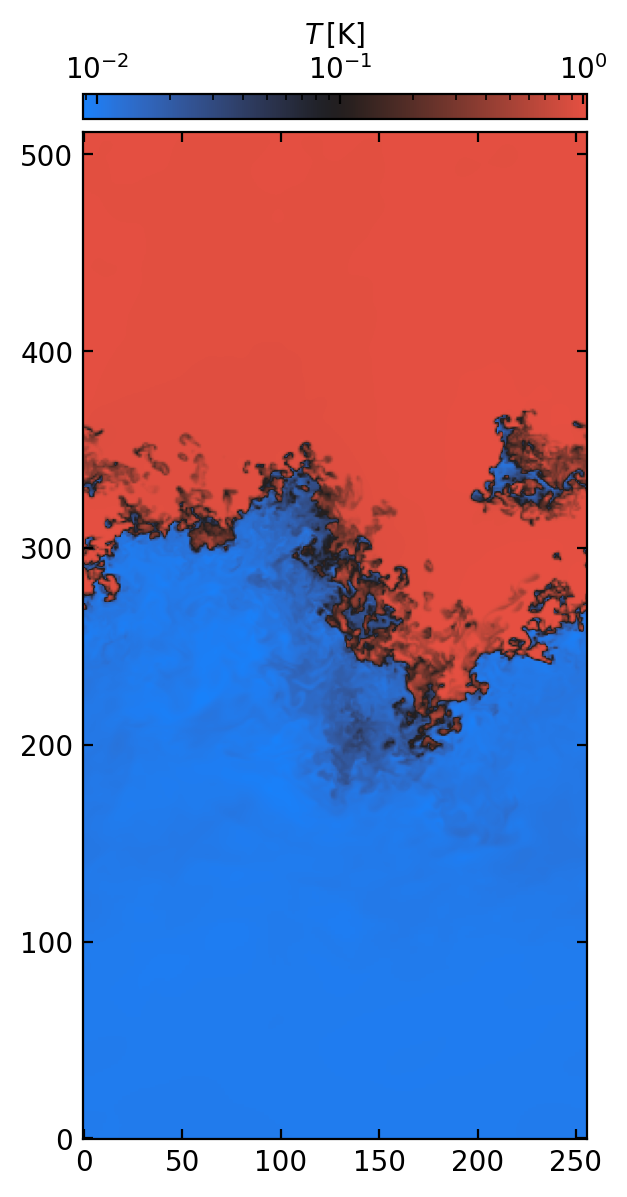

In [94]:
fig, ax = plt.subplots()
plot = ax.imshow(data, origin='lower', aspect='equal', cmap=cc.cm.bkr, norm=colors.LogNorm())
cbar = fig.colorbar(plot, ax=ax, location='top', pad = 0.01)
cbar.set_label(r'$T \, [{\rm K}]$')
fig.set_size_inches(3.25, 8)

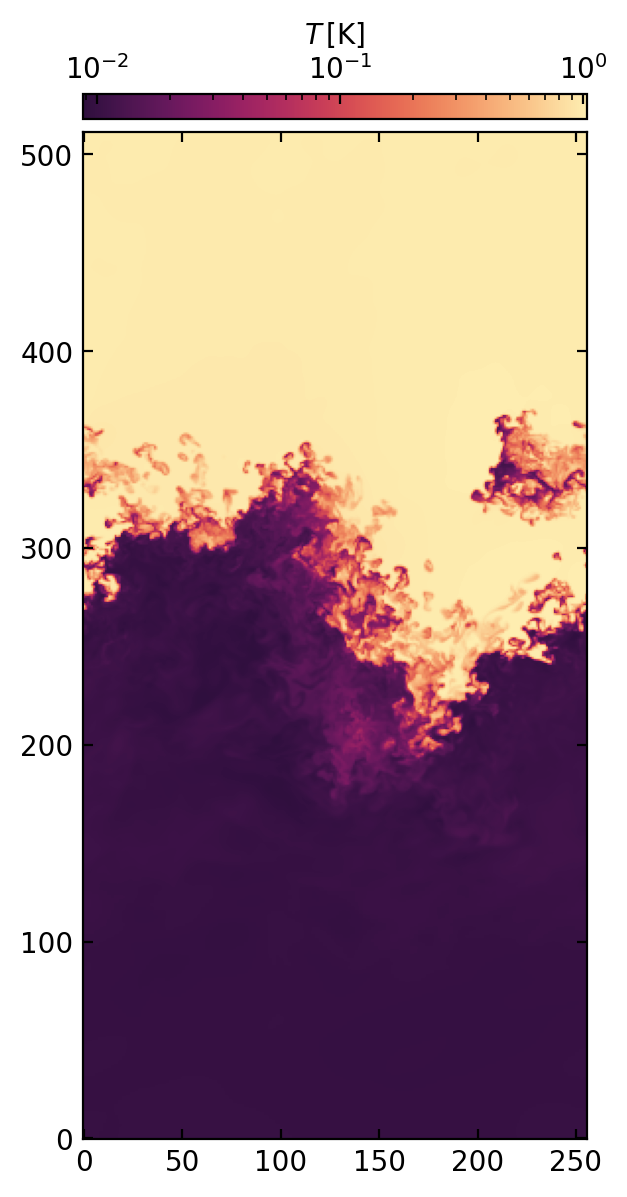

In [97]:
fig, ax = plt.subplots()
plot = ax.imshow(data, origin='lower', aspect='equal', cmap=palettable.cmocean.sequential.Matter_20_r.mpl_colormap, norm=colors.LogNorm())
cbar = fig.colorbar(plot, ax=ax, location='top', pad = 0.01)
cbar.set_label(r'$T \, [{\rm K}]$')
fig.set_size_inches(3.25, 8)

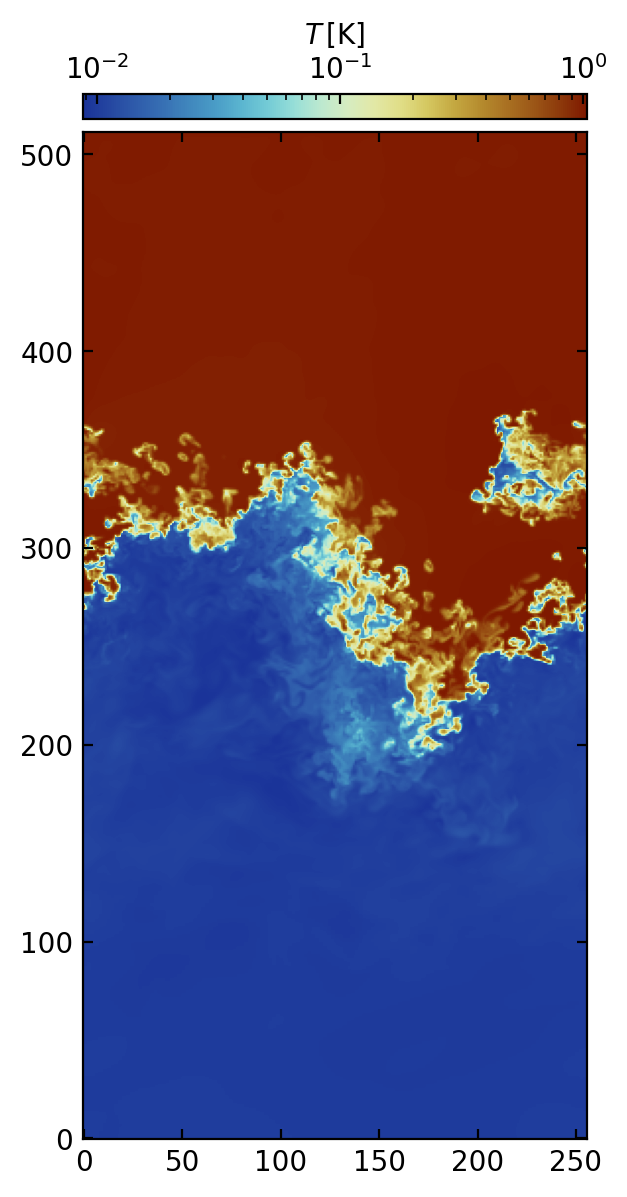

In [95]:
fig, ax = plt.subplots()
plot = ax.imshow(data, origin='lower', aspect='equal', cmap=palettable.scientific.diverging.Roma_20_r.mpl_colormap , norm=colors.LogNorm())
cbar = fig.colorbar(plot, ax=ax, location='top', pad = 0.01)
cbar.set_label(r'$T \, [{\rm K}]$')
fig.set_size_inches(3.25, 8)

# the previous example was a case where using a diverging colormap was a good choice, but there are many other cases where you might want to use a linear colormap

In [79]:
data = np.load('../data/Turbulence_exampled_data.npz')['data']

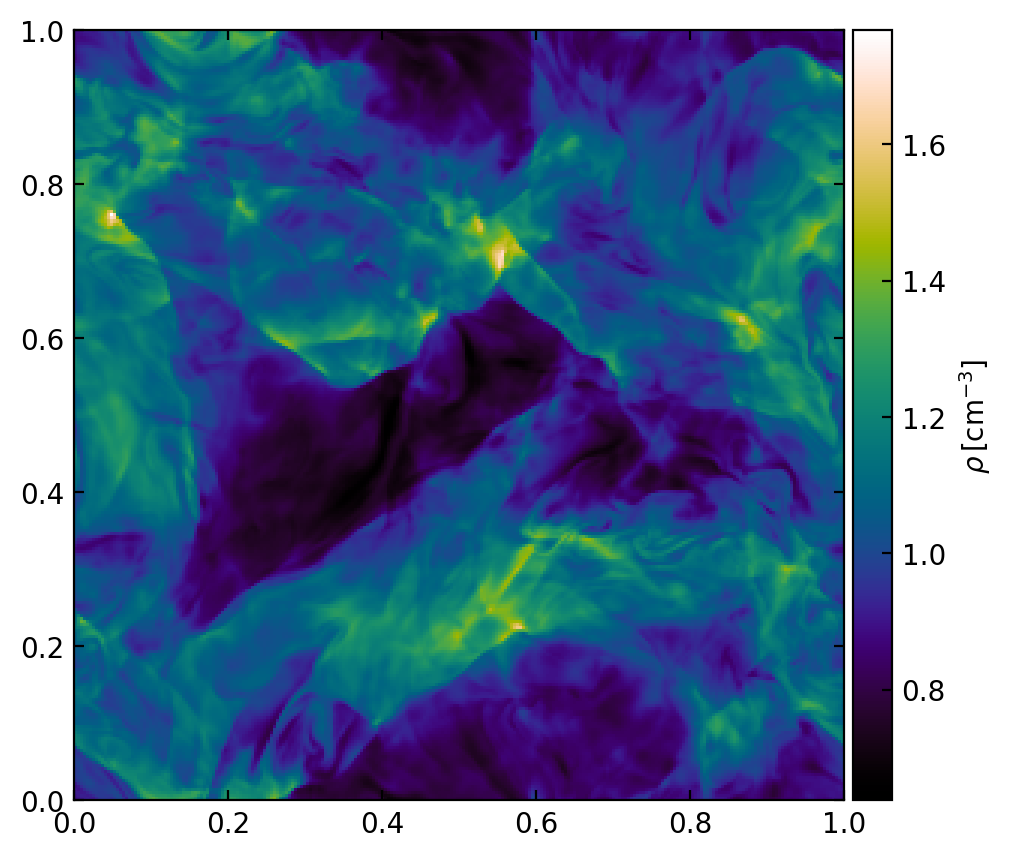

In [80]:
fig, ax = plt.subplots()
plot = ax.imshow(data, origin='lower', aspect='equal', cmap=cmr.rainforest, extent=[0, 1, 0, 1])
cbar = fig.colorbar(plot, ax=ax, location='right', pad = 0.01)
cbar.set_label(r'$\rho \, [{\rm cm}^{-3}]$')
fig.set_size_inches(6, 5)


# this previous example also highlights a pet peeve of mine. x and y ranges are the same but the ticks are different!

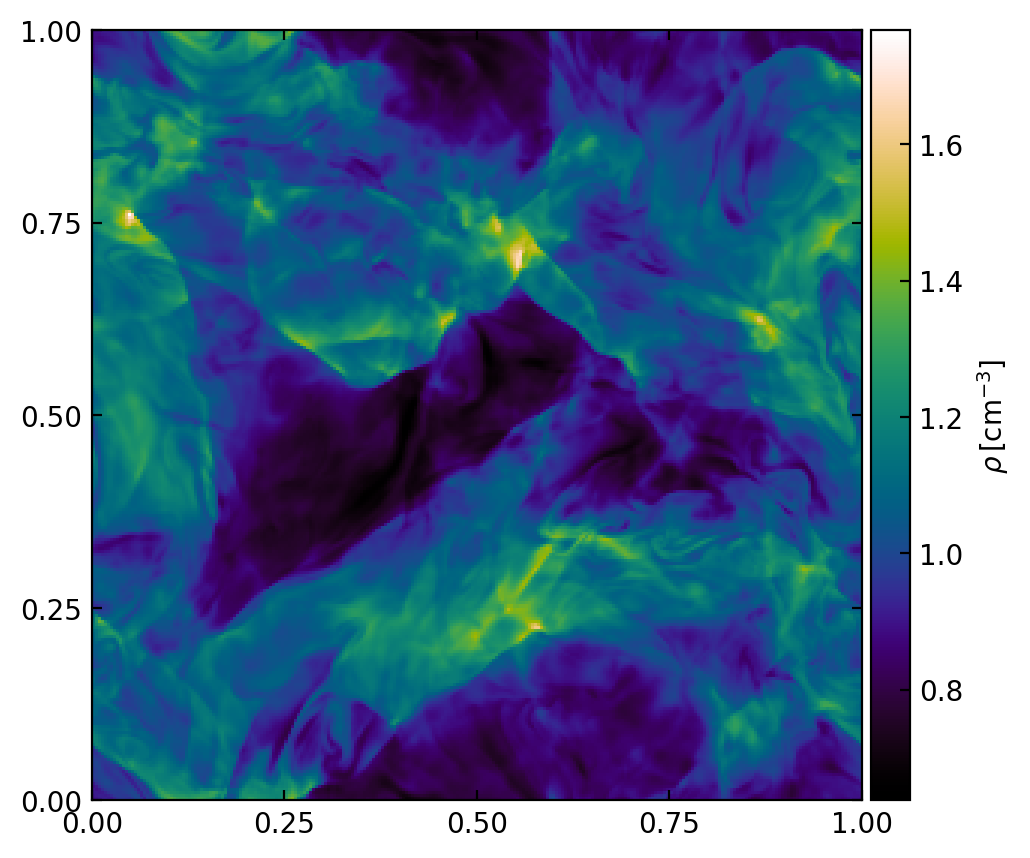

In [81]:
fig, ax = plt.subplots()
plot = ax.imshow(data, origin='lower', aspect='equal', cmap=cmr.rainforest, extent=[0, 1, 0, 1])
cbar = fig.colorbar(plot, ax=ax, location='right', pad = 0.01)
cbar.set_label(r'$\rho \, [{\rm cm}^{-3}]$')
fig.set_size_inches(6, 5)

_= ax.set_xticks(np.linspace(0, 1, 5))
_= ax.set_yticks(np.linspace(0, 1, 5))

# Now that we have fixed that, look at what happens if we use a diverging colormap

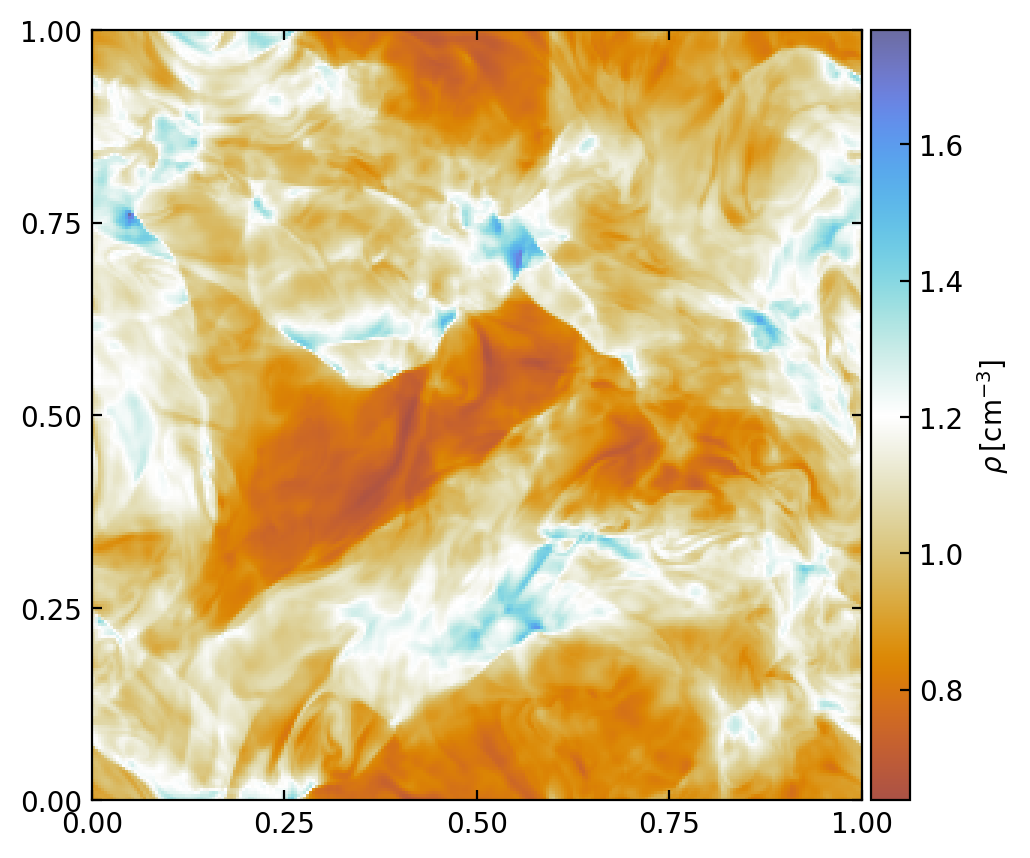

In [82]:
fig, ax = plt.subplots()
plot = ax.imshow(data, origin='lower', aspect='equal', cmap=cmr.prinsenvlag, extent=[0, 1, 0, 1])
cbar = fig.colorbar(plot, ax=ax, location='right', pad = 0.01)
cbar.set_label(r'$\rho \, [{\rm cm}^{-3}]$')
fig.set_size_inches(6, 5)

_= ax.set_xticks(np.linspace(0, 1, 5))
_= ax.set_yticks(np.linspace(0, 1, 5))

# Your eye is drawn to the white, but there is nothing special about the white, so be careful!!

# This is also a problem when plotting phase distributions or 2D PDFs

In [83]:
pdf_data = np.load('../data/2D_Distribution_example.npz')
data = pdf_data['data']
bins1 = pdf_data['bins1']
bins2 = pdf_data['bins2']

# using a colormap that is dark at low values with a 2D PDF will draw the eye to the edge of the distribution where there is actually very little going on, and you will miss the interesting stuff in the middle

# bad

Text(0, 0.5, 'y')

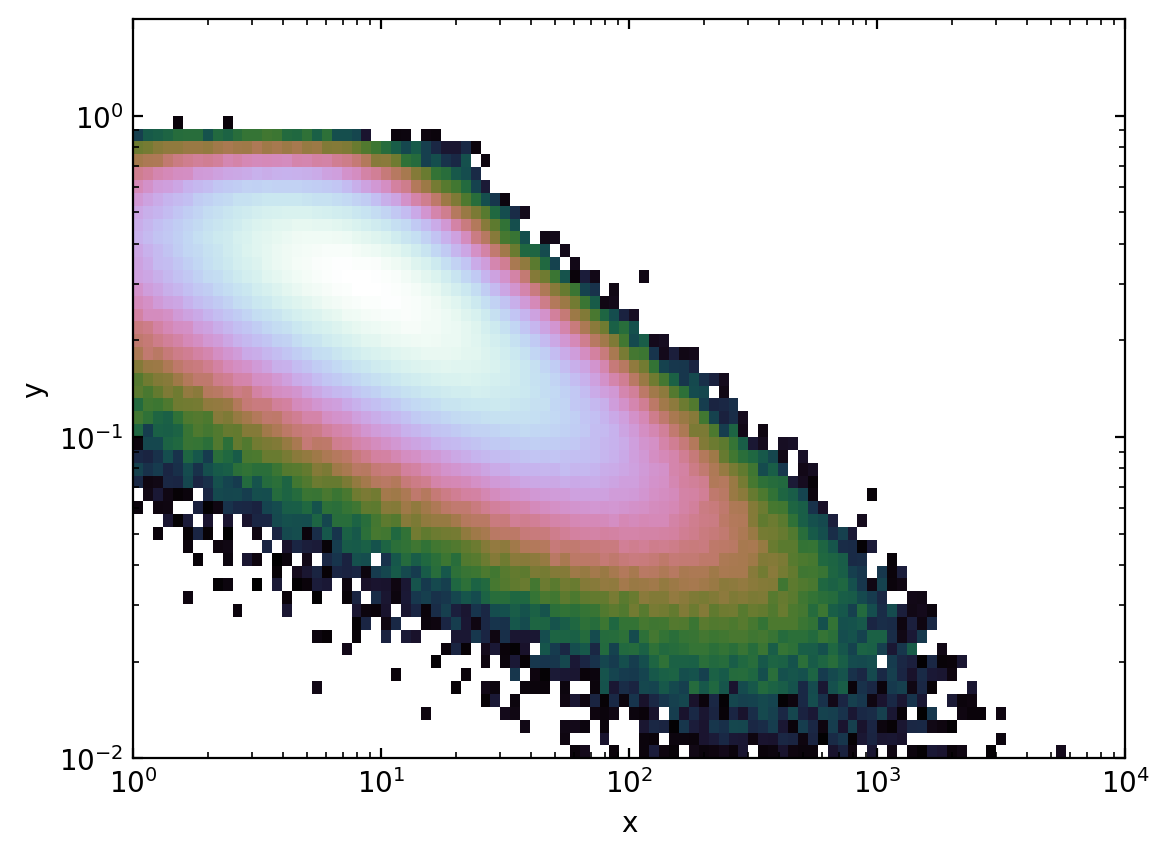

In [84]:
plt.pcolormesh(bins1, bins2, data, norm=colors.LogNorm(), cmap = 'cubehelix')
plt.loglog()
plt.ylim((1e-2,2e0))
plt.xlabel('x')
plt.ylabel('y')

# Good!

Text(0, 0.5, 'y')

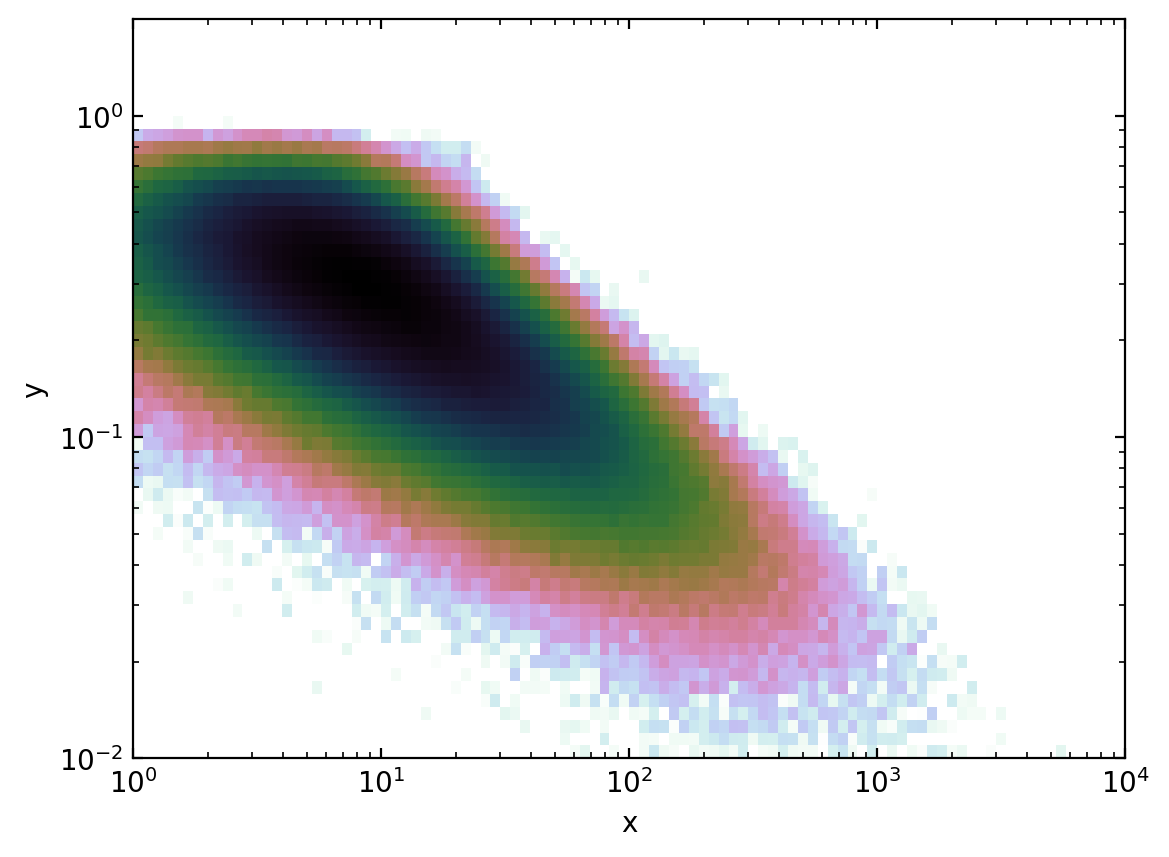

In [85]:
plt.pcolormesh(bins1, bins2, data, norm=colors.LogNorm(), cmap = 'cubehelix_r')
plt.loglog()
plt.ylim((1e-2,2e0))
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

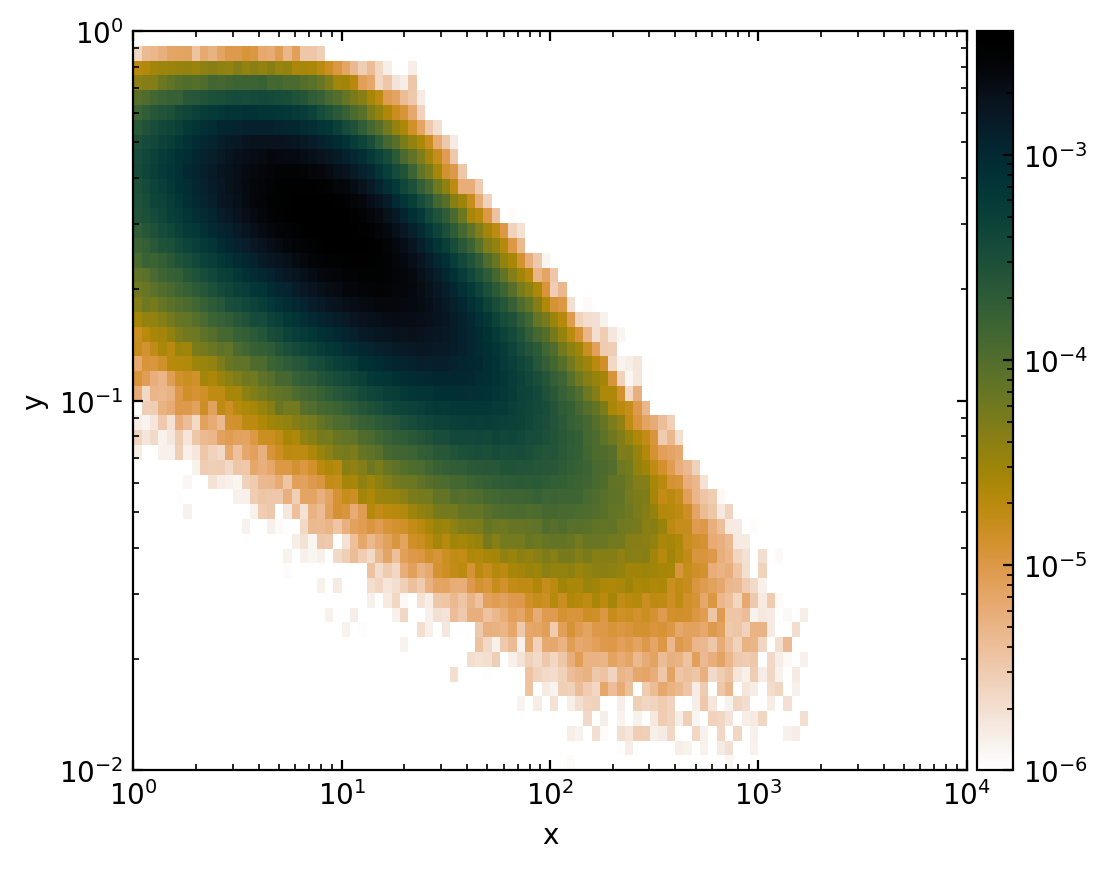

In [86]:
fig, ax = plt.subplots()
plot = ax.pcolormesh(bins1, bins2, data, norm=colors.LogNorm(vmin = 1e-6), cmap = cmr.savanna_r)
cb = fig.colorbar(plot, ax=ax, location='right', pad = 0.01)
ax.loglog()
ax.set_xlabel('x')
ax.set_ylabel('y')